In [1]:
pip install pandas matplotlib seaborn nltk textblob wordcloud


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   - ------------------------------------- 20.5/626.3 kB 131.3 kB/s eta 0:00:05
   --- ----------------------------------- 51.2/626.3 kB 104.8 kB/s eta 0:00:06
   ---- ---------------------------------- 71.7/626.3 kB 135.6 kB/s eta 0:00:05
   ----- --------------------------------- 81.9/626.3 kB 143.4 kB/s eta 0:00:04
   ------ ------------------------------- 102.4/626.3 kB

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is in a CSV file named 'app_reviews.csv'
data = [
    {"review": "App started out strong but recent app update now causes it to crash every few seconds. Too bad because it was great for awhile.", "rating": 1},
    {"review": "Stopped working after last update... Not good really from a supposed top draw social networking company", "rating": 1},
    # ... (add all the reviews here)
]


In [7]:
df = pd.read_excel("C:\\Users\\kaila\\Downloads\\linkedin-reviews.xlsx")
df

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

C:\Users\kaila\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


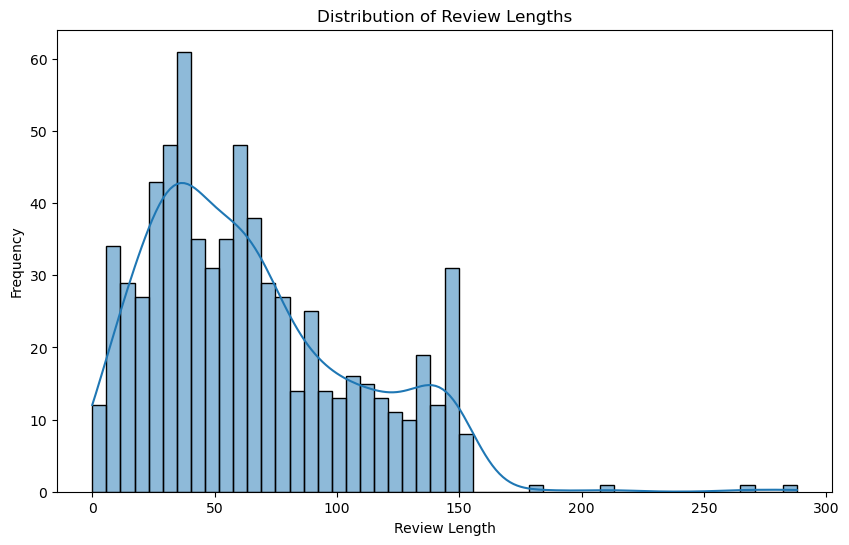

In [16]:

# Assuming your DataFrame is named df and you have a 'Review' column
# Fill NaN values with an empty string
df['Review'] = df['Review'].fillna('')

# Calculating the length of each review
df['Review Length'] = df['Review'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


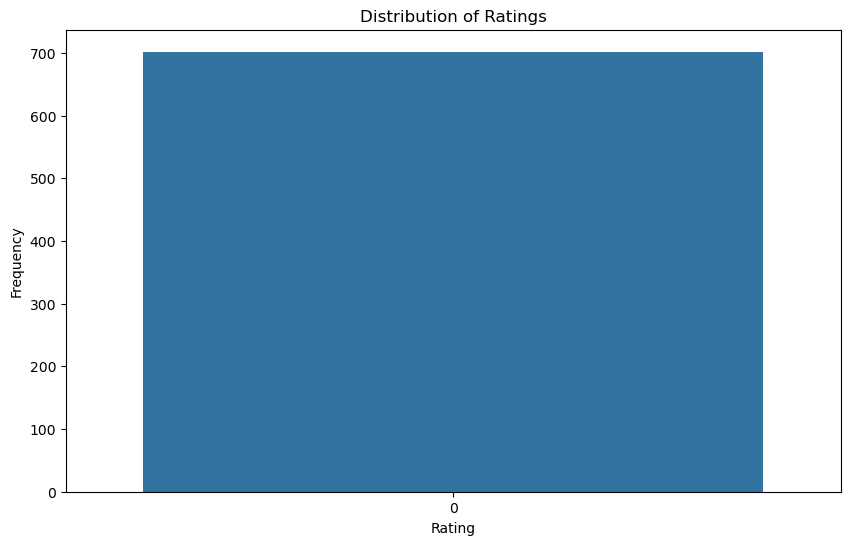

In [12]:
# Rating distribution analysis
plt.figure(figsize=(10, 6))
sns.countplot(df['Rating'])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

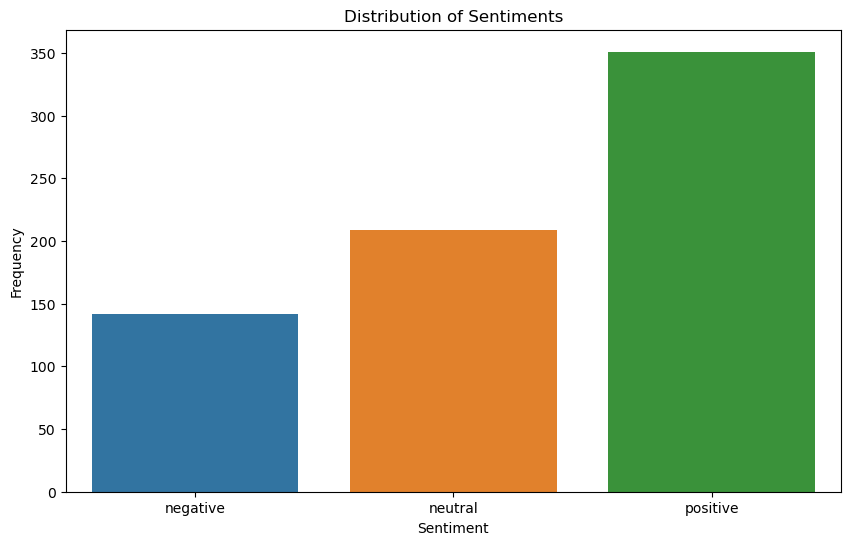

In [29]:
# Assuming your DataFrame is named df and you have a 'Review' column
# Fill NaN values with an empty string
df['Review'] = df['Review'].fillna('')

# Function to determine sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Applying the function to the 'Review' column
df['sentiment'] = df['Review'].apply(get_sentiment)

# Plotting the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

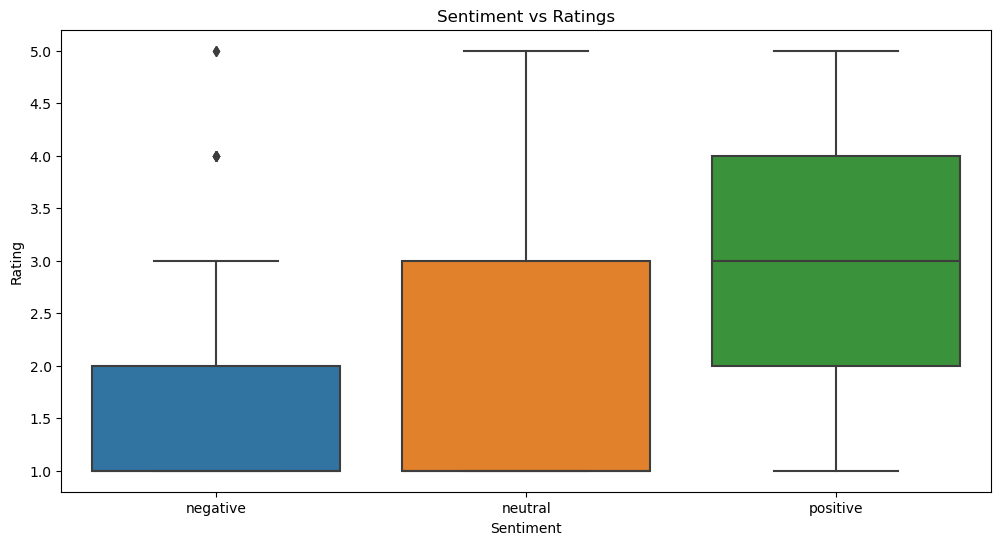

In [30]:
# Exploring the Relationship Between Sentiments and Ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='Rating', data=df)
plt.title('Sentiment vs Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()

In [31]:
# Text Analysis to Identify Common Themes or Words
def plot_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

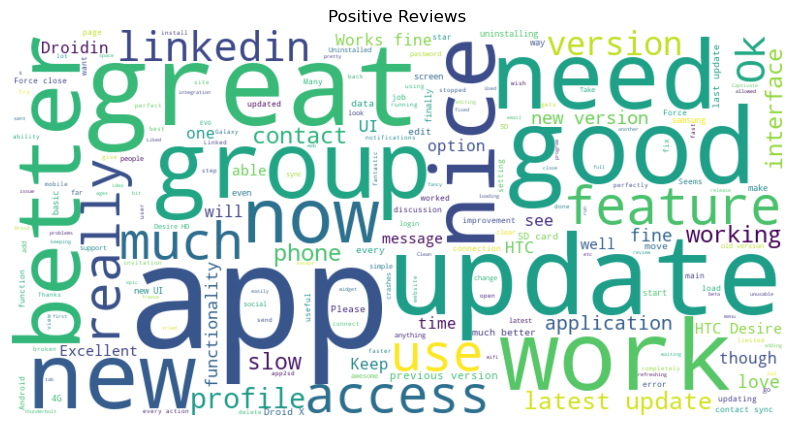

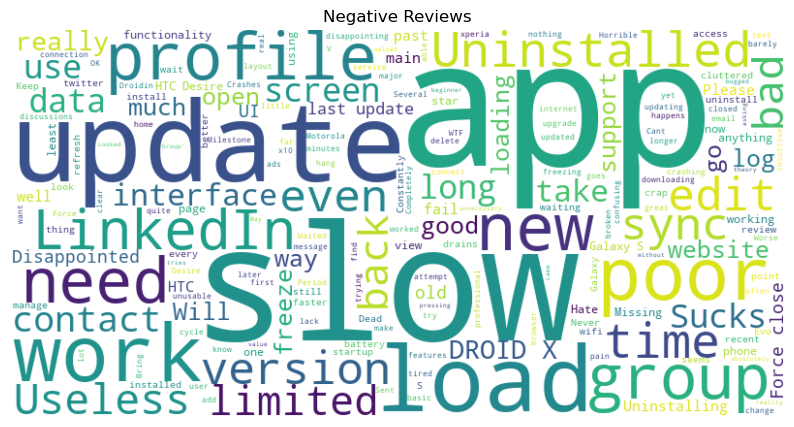

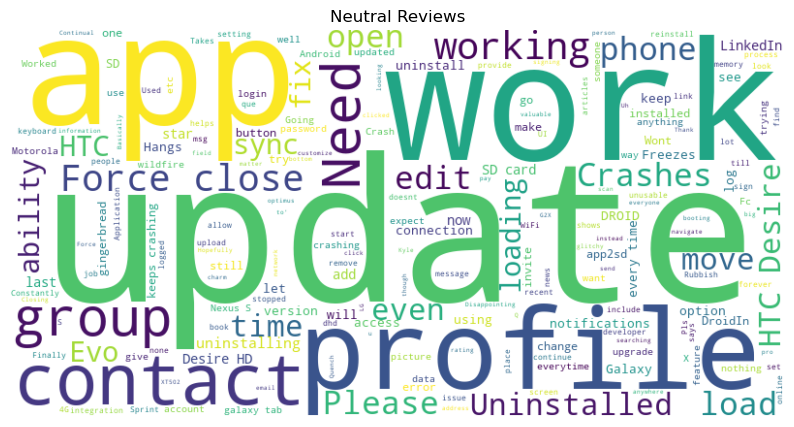

In [33]:
# Positive reviews wordcloud
positive_reviews = df[df['sentiment'] == 'positive']['Review']
plot_wordcloud(positive_reviews, 'Positive Reviews')

# Negative reviews wordcloud
negative_reviews = df[df['sentiment'] == 'negative']['Review']
plot_wordcloud(negative_reviews, 'Negative Reviews')

# Neutral reviews wordcloud
neutral_reviews = df[df['sentiment'] == 'neutral']['Review']
plot_wordcloud(neutral_reviews, 'Neutral Reviews')